### Курсовая работа по вычислительной математике студента 642 группы Ф.Полещука

# ОДНОМЕРНОЕ УРАВНЕНИЕ ТЕПЛОПРОВОДНОСТИ С ХИМИЧЕСКОЙ РЕАКЦИЕЙ В МАТЕРИАЛЕ (ТЕРМИЧЕСКОЕ РАЗЛОЖЕНИЕ) 

Рассмотрим теплоперенос в бесконечной пластине, подверженной
термическому разложению (например, полимерный материал). На
границах осуществляется теплообмен с окружающей средой.
Математическая постановка сформулированной задачи: 

$$\rho c \dfrac{\partial T}{\partial t} = \lambda\dfrac{\partial^2T}{\partial x^2} + q_{хим}k_{0}\rho \exp \left( -\frac{E}{RT} \right) , 0<x<L; $$

$$t=0: T=T_{0}, 0\leq x\leq L;$$

$$x=0: \lambda\dfrac{\partial T}{\partial x}=\kappa (T^e-T), t> 0;$$

$$x=L: \lambda\dfrac{\partial T}{\partial x}=\kappa (T^e-T), t> 0;$$


где $q_{хим}$ – тепловой эффект химической реакции, $k_0$ – предэкспонент
химической реакции, $Е$ – энергия активации химической реакции,
$R = 8.31 Дж/(моль \centerdot К)$– универсальная газовая постоянная.

Для решения сформулированной краевой задачи применим метод
конечных разностей на основе неявной четырехточечной схемы
совместно с методом простой итерации. В результате аппроксимации
частных производных получаем следующую систему уравнений:

$$\rho \centerdot c \centerdot \dfrac{T_i^{n+1}-T_i^n}{\tau} = \lambda \left( \dfrac{T_{i+1}^{n+1}-2\centerdot T_i^{n+1}+T_{i-1}^{n+1}}{h^2} \right) + q_{хим}k_0\rho\exp \left( -\frac{E}{RT_i^{n+1}} \right) $$

$$i=2,...,N-1, n\geq 0.$$

Полученную систему можно свести к наиболее общему виду:

$$A_i \centerdot T_{i+1}^{n+1} - B_i \centerdot T_i^{n+1} + C_i \centerdot T_{i-1}^{n+1} =F_i,$$

где

$$A_i=C_i=\frac{\lambda}{h^2}, B_i = \frac{2\centerdot\lambda}{h^2}+\frac{\rho c}{\tau}, F_i=-\frac{\rho c}{\tau}T_i^{n}-q_{хим}k_0\rho\exp \left( -\frac{E}{RT_i^{n+1}} \right) $$

Коэффициент $F_i$ зависит от температуры на новом временном
слое, поэтому необходимо воспользоваться методом простой итерации.
Основная идея, которого будет заключаться в определении поля
температуры на каждом временном слое до тех пор, пока максимальная
разность между локальными значениями температуры на данной и на
предыдущей итерации не будет минимальна или: 

$$\max\limits_{i} |T_i^{S+1}-T_{i}^{S}|\leq \varepsilon $$

где $\varepsilon$ – точность вычислений.

Определим температурное поле в пластине через $600$, $1800$ и $3600$
секунд. Толщина пластины $L = 0.2 м$ . Начальная температура
$T_0 = 298K$ . 

Материал пластины – полимер со следующими
теплофизическими характеристиками $λ = 0,7 Вт/(м⋅К)$, $ρ = 1500 кг/м^3$,
$с = 750 Дж/(кг⋅К)$.

На границах $x = 0$ и $x = L$ пластина контактирует с
окружающей средой 
$(κ =  40Вт (м^2⋅K)$   , $ T^e =243 K  )$. $q_{хим} =  10^3 Вт/кг$, $k_0 = 3⋅10^4$ ,  $E = 8⋅10^4Дж/моль $. 

Ниже приведен листинг программы для решения рассматриваемой
задачи (на языке программирования Python)

In [484]:
import math as m
import numpy as np

In [438]:
mf=1001
eps=0.001
R=8.31
N=1000 #количество пространственных узлов
t_end=1000 #окончание по времени
L=0.2 #толщина пластины
lamda=0.7 #коэффициент теплопроводности материала пластины
ro=1005 #плотность материала пластины
c=750 #теплоемкость материала пластины
kapa=4000 #коэффициент теплообмена с окружающей средой
Te=273 #температура окружающей среды
q=1000 #тепловой эффект химической реакции
k0=30000 #предэкспонент
E=80000 #энергия активации химической реакции
T0=298 #начальная температура

In [439]:
def T(t_end):
    T=np.zeros(N+1)
    Ts=np.zeros(mf)
    Tn=np.zeros(mf)
    alfa=np.zeros(mf)
    beta =np.zeros(mf)


    h = L / (N - 1)

    tau = t_end / 100.0

    for i in range(1,N+1):
        T[i] = T0

    time = 0
    while (time < t_end): 

        time = time + tau;
        alfa[1] = 2.0 * tau * lamda / (2.0 * tau * (lamda + kapa * h) + ro * c * (h**2))
        beta[1] = (ro * c * (h**2) * T[1] + 2.0 * tau * kapa * h * Te) / (2.0 * tau * (lamda + kapa * h) + ro * c * (h**2))
        for i in range(1,N+1):
            Tn[i] = T[i]

        while True:
            for i in range(1,N+1):
                Ts[i] = T[i]

            for i in range(2,N):
                ai = lamda / (h**2)
                bi = 2.0 * lamda / (h**2) + ro * c / tau
                ci = lamda / (h**2)
                fi = -ro * c * Tn[i] / tau - q * k0 * ro * m.exp(-E / (R * T[i]))
                alfa[i] = ai / (bi - ci * alfa[i - 1])
                beta[i] = (ci * beta[i - 1] - fi) / (bi - ci * alfa[i - 1])

            T[N] = (ro * c * (h**2) * Tn[N] + 2.0 * tau * (lamda * beta[N - 1] + kapa * h * Te)) / (ro * c * (h**2) + 2.0 * tau * (lamda * (1 - alfa[N - 1]) + kapa * h))
            for i in range(N-1,0,-1):
                T[i] = alfa[i] * T[i + 1] + beta[i];

            maximum = abs(T[1] - Ts[1]);
            for i in range(2,N+1):
                if maximum < abs(T[i] - Ts[i]):
                    maximum = abs(T[i] - Ts[i])
            if(maximum <= eps): 
                break
               
    T[0]=T[1]
    return(np.delete(T, 0, 0))
  



Получены следующие распределения температуры: 

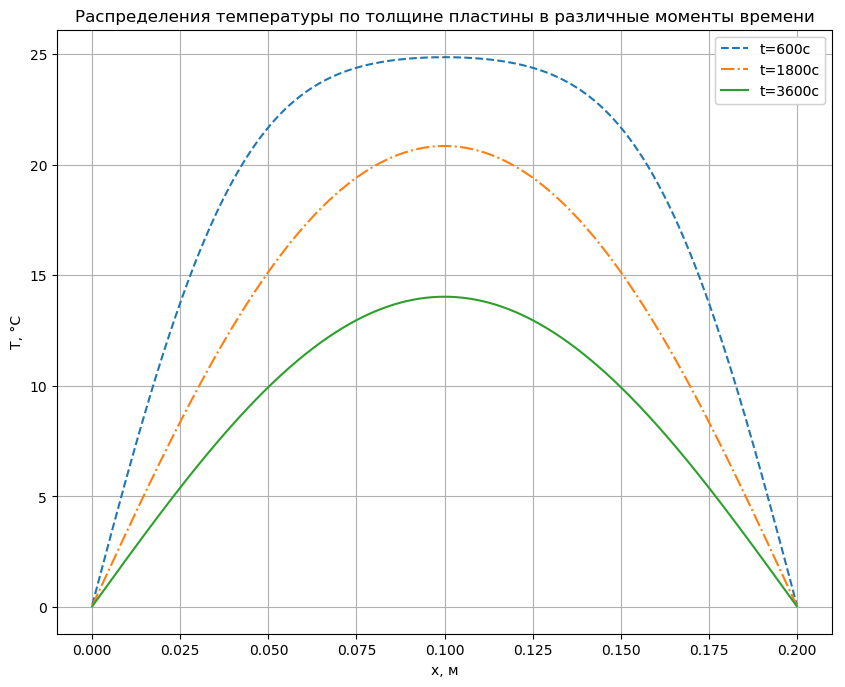

In [486]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(num=None, figsize=(10, 8), dpi=100, edgecolor='k')
line1, = plt.plot(t,T(600)-273, label="t=600c", linestyle='--')
line2, = plt.plot(t,T(1800)-273, label="t=1800c", linestyle='-.')
line3, = plt.plot(t,T(3600)-273, label="t=3600c", linestyle='-')

# Create a legend for the first line.
first_legend = plt.legend(loc=1)
plt.title('Распределения температуры по толщине пластины в различные моменты времени')

# Add the legend manually to the current Axes.
ax = plt.gca().add_artist(first_legend)
plt.grid(True)
plt.ylabel('T, °C')
plt.xlabel('x, м')
plt.show()